## Intro to OpenCV

## Blur Image

2,3

In [35]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

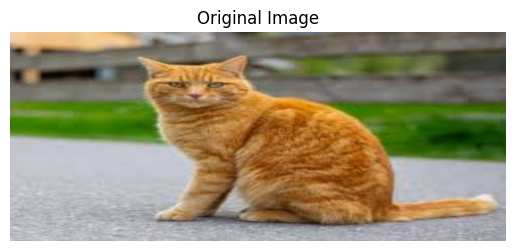

In [ ]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
image_path = Path('./Images/download.jpeg')
try:
    image = cv2.imread(str(image_path))
    if image is None:
        raise FileNotFoundError
except FileNotFoundError:
    raise FileNotFoundError(f"Image not found at: {image_path}")
dimensions = (1900, 800)
resized_image = cv2.resize(image, dimensions, interpolation=cv2.INTER_AREA)
b, g, r = cv2.split(resized_image)
resized_image_rgb = cv2.merge([r, g, b])
plt.figure(figsize=(10, 5))
plt.imshow(resized_image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


### After Blurring

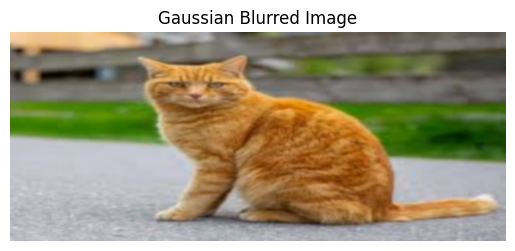

In [9]:
Gaussian = cv2.GaussianBlur(resized_image, (15, 15), 0)  
Gaussian_rgb = cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB)  
plt.imshow(Gaussian_rgb)
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

In [ ]:
import cv2
from pathlib import Path
img_path = Path('./Images/download.jpeg')
import numpy as np
with open(img_path, 'rb') as f:
    img_array = np.asarray(bytearray(f.read()), dtype=np.uint8)
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
if image is None:
    raise FileNotFoundError(f"Could not load image at: {img_path}")
cv2.namedWindow('Original', cv2.WINDOW_AUTOSIZE)
cv2.imshow('Original', image)
cv2.waitKey(0)
b, g, r = cv2.split(image)
gray_image = (0.114 * b + 0.587 * g + 0.299 * r).astype('uint8')
cv2.imshow('Grayscale', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


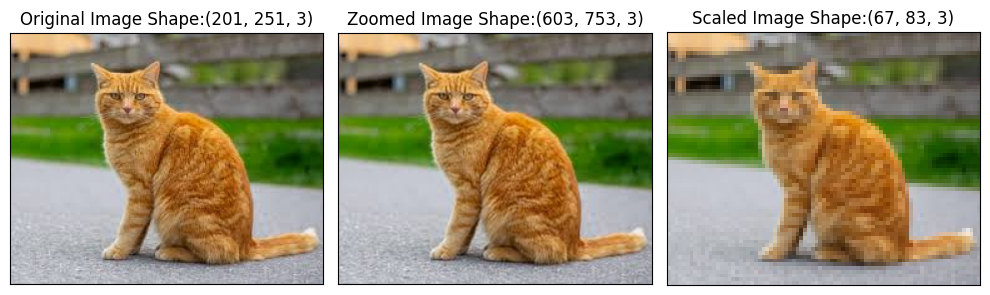

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from pathlib import Path
img_path = Path('./Images/download.jpeg')
pil_img = Image.open(img_path)
image_rgb = np.array(pil_img)
scale_up = 3.0
scale_down = 1 / 3.0
height, width = image_rgb.shape[:2]
zoomed_image = np.array(
    pil_img.resize((int(width * scale_up), int(height * scale_up)), Image.BICUBIC)
)
scaled_image = np.array(
    pil_img.resize((int(width * scale_down), int(height * scale_down)), Image.Resampling.LANCZOS)
)
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].imshow(image_rgb)
axs[0].set_title(f'Original Image Shape: {image_rgb.shape}')
axs[1].imshow(zoomed_image)
axs[1].set_title(f'Zoomed Image Shape: {zoomed_image.shape}')
axs[2].imshow(scaled_image)
axs[2].set_title(f'Scaled Image Shape: {scaled_image.shape}')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


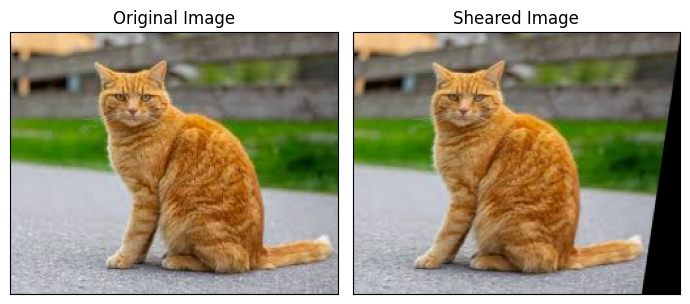

In [19]:
image = cv2.imread('./Images/download.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
width, height = image_rgb.shape[1], image_rgb.shape[0]

shearX, shearY = -0.15, 0
transformation_matrix = np.array([[1, shearX, 0], [0, 1, shearY]], dtype=np.float32)
sheared_image = cv2.warpAffine(image_rgb, transformation_matrix, (width, height))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(sheared_image), axs[1].set_title('Sheared Image')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

[[0.98039216 0.97647059 0.97647059 ... 0.38823529 0.39607843 0.40784314]
 [0.97647059 0.97647059 0.97647059 ... 0.39215686 0.4        0.41176471]
 [0.97254902 0.97254902 0.97254902 ... 0.4        0.40784314 0.41960784]
 ...
 [0.78823529 0.74117647 0.69019608 ... 0.61176471 0.61176471 0.61960784]
 [0.8        0.75686275 0.72156863 ... 0.61176471 0.61176471 0.60784314]
 [0.74901961 0.7372549  0.71764706 ... 0.63137255 0.63137255 0.63137255]]


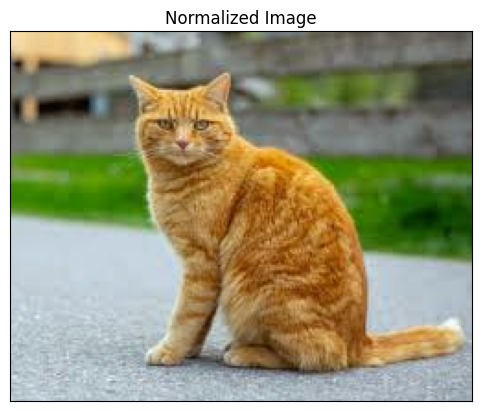

In [20]:
image = cv2.imread('./Images/download.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
b, g, r = cv2.split(image_rgb)

b_normalized = cv2.normalize(b.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
g_normalized = cv2.normalize(g.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
r_normalized = cv2.normalize(r.astype('float'), None, 0, 1, cv2.NORM_MINMAX)

normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))
print(normalized_image[:, :, 0])

plt.imshow(normalized_image)
plt.xticks([]), 
plt.yticks([]), 
plt.title('Normalized Image')
plt.show()

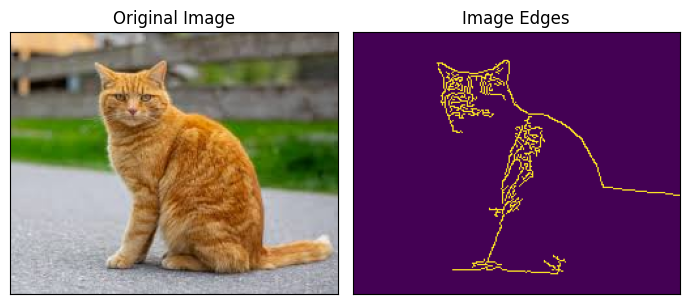

In [21]:
img = cv2.imread('./Images/download.jpeg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(image_rgb, 100, 700)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(edges), axs[1].set_title('Image Edges')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

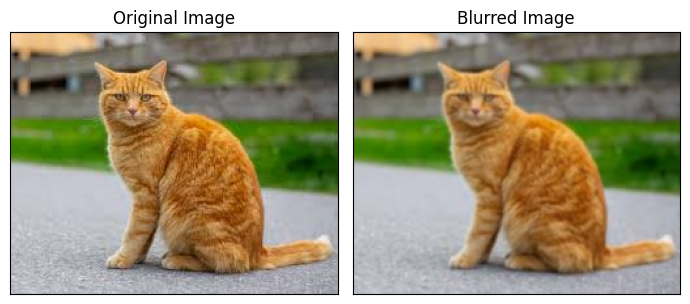

In [22]:
image = cv2.imread('./Images/download.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blurred = cv2.GaussianBlur(image, (3, 3), 0)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(blurred_rgb), axs[1].set_title('Blurred Image')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

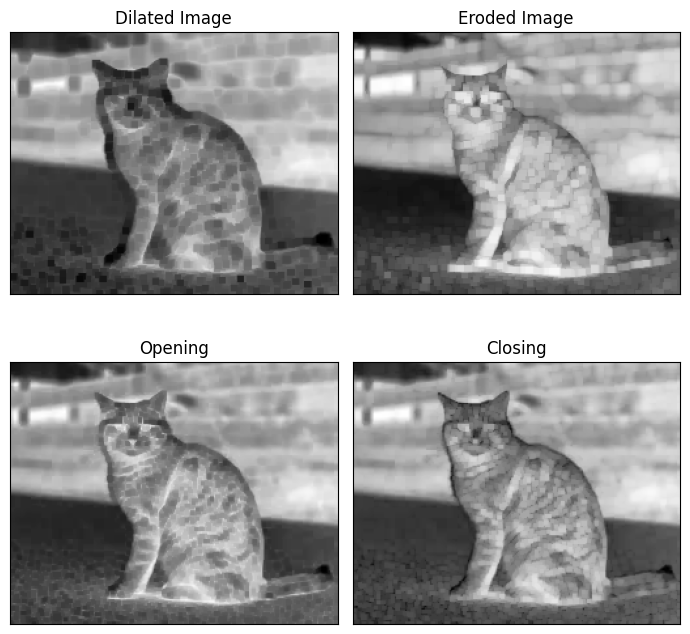

In [23]:
image = cv2.imread('./Images/download.jpeg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3, 3), np.uint8)

dilated = cv2.dilate(image_gray, kernel, iterations=2)
eroded = cv2.erode(image_gray, kernel, iterations=2)
opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs[0, 0].imshow(dilated, cmap='Greys'), axs[0, 0].set_title('Dilated Image')
axs[0, 1].imshow(eroded, cmap='Greys'), axs[0, 1].set_title('Eroded Image')
axs[1, 0].imshow(opening, cmap='Greys'), axs[1, 0].set_title('Opening')
axs[1, 1].imshow(closing, cmap='Greys'), axs[1, 1].set_title('Closing')

for ax in axs.flatten():
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
img = cv2.imread('./Images/download.jpeg', 0)
c = 255/(np.log(1 + np.max(img)))
log_transformed = c * np.log(1 + img)
log_transformed = np.array(log_transformed, dtype = np.uint8)
cv2.imwrite('log_transformed.jpg', log_transformed)

True

In [ ]:
img = cv2.imread('./Images/download.jpeg', 0)
for gamma in [0.1, 0.5, 1.2, 2.2]:
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
    cv2.imwrite('./Images/gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)

In [ ]:
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
img = cv2.imread('./Images/download.jpeg', 0)
r1 = 70
s1 = 0
r2 = 140
s2 = 255
pixelVal_vec = np.vectorize(pixelVal)
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)
cv2.imwrite('./Images/contrast_stretch.jpg', contrast_stretched)

True

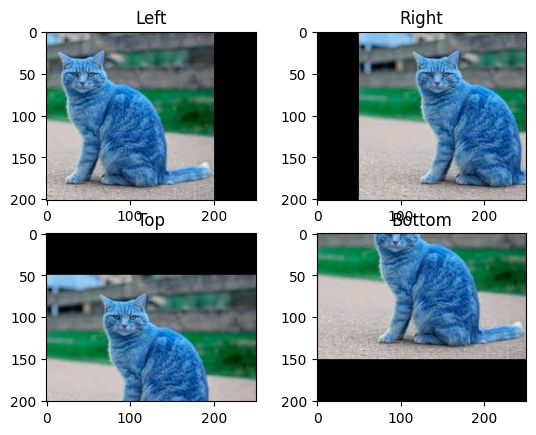

In [36]:
img = cv2.imread('./Images/download.jpeg')
rows, cols, _ = img.shape

M_left = np.float32([[1, 0, -50], [0, 1, 0]])
M_right = np.float32([[1, 0, 50], [0, 1, 0]])
M_top = np.float32([[1, 0, 0], [0, 1, 50]])
M_bottom = np.float32([[1, 0, 0], [0, 1, -50]])

img_left = cv2.warpAffine(img, M_left, (cols, rows))
img_right = cv2.warpAffine(img, M_right, (cols, rows))
img_top = cv2.warpAffine(img, M_top, (cols, rows))
img_bottom = cv2.warpAffine(img, M_bottom, (cols, rows))

plt.subplot(221), plt.imshow(img_left), plt.title('Left')
plt.subplot(222), plt.imshow(img_right), plt.title('Right')
plt.subplot(223), plt.imshow(img_top), plt.title('Top')
plt.subplot(224), plt.imshow(img_bottom), plt.title('Bottom')
plt.show()

In [37]:
img = cv2.imread('./Images/download.jpeg', 0)  
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))

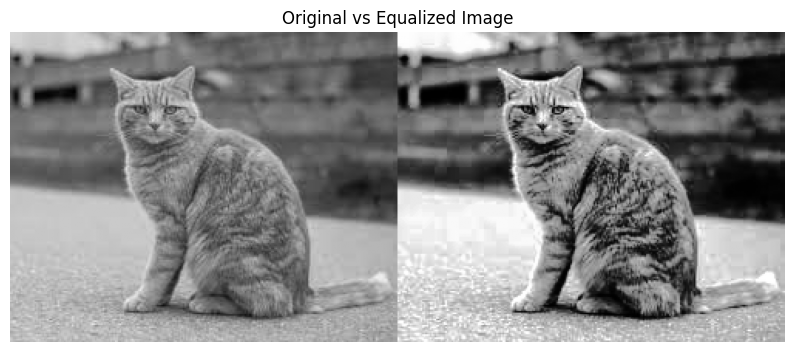

In [38]:
plt.figure(figsize=(10, 5))
plt.imshow(res, cmap='gray')  
plt.title("Original vs Equalized Image")
plt.axis('off')  
plt.show()

In [42]:
src = cv2.imread(r'./Images/geeks14.png')  # Read the image

if src is None:
	raise FileNotFoundError("Image not found at path: ./Images/logo.png")

# Convert to Grayscale
gray_image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Display
cv2.imshow("Grayscale Image", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
hsv_image = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.imshow("HSV Image", hsv_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

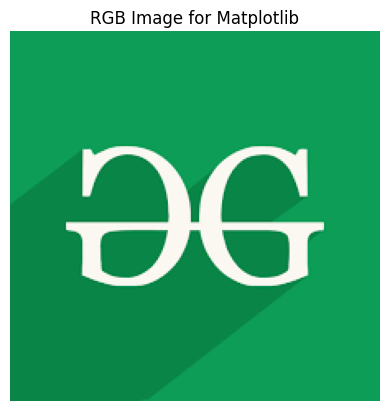

In [44]:
rgb_image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

# Display with Matplotlib
plt.imshow(rgb_image)
plt.title("RGB Image for Matplotlib")
plt.axis('off')
plt.show()

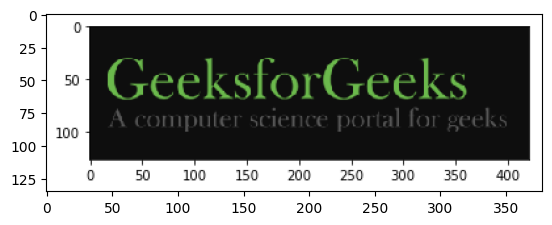

In [51]:
img = cv2.imread('./Images/out2-2.png')

# shows the image
plt.imshow(img)
img = cv2.imread('./Images/geeks14.png', 1) 

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Shows the image
cv2.imshow('image', img) 

cv2.waitKey(0)         
cv2.destroyAllWindows()

In [ ]:
damaged_img = cv2.imread(filename=r"./Images/cat_damaged.png")
height, width = damaged_img.shape[0], damaged_img.shape[1]
for i in range(height):
    for j in range(width):
        if damaged_img[i, j].sum() > 0:
            damaged_img[i, j] = 0
        else:
            damaged_img[i, j] = [255, 255, 255]
mask = damaged_img
cv2.imwrite('mask.jpg', mask)
cv2.imshow("damaged image mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('./Images/cat_damaged.png')
mask = cv2.imread('./Images/cat_damaged.png', 0)
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)
cv2.imwrite('cat_inpainted.png', dst)

True

In [ ]:
import cv2
import numpy as np
from pathlib import Path
img_path1 = Path("./Images/im1-copy.webp")
img_path2 = Path("./Images/im1-copy.webp")
with open(img_path1, 'rb') as f:
    img1_buf = np.asarray(bytearray(f.read()), dtype=np.uint8)
img1_color = cv2.imdecode(img1_buf, cv2.IMREAD_COLOR)

with open(img_path2, 'rb') as f:
    img2_buf = np.asarray(bytearray(f.read()), dtype=np.uint8)
img2_color = cv2.imdecode(img2_buf, cv2.IMREAD_COLOR)
b1, g1, r1 = cv2.split(img1_color)
b2, g2, r2 = cv2.split(img2_color)
img1_gray = cv2.addWeighted(r1, 0.299, cv2.addWeighted(g1, 0.587, b1, 0.114, 0), 1.0, 0)
img2_gray = cv2.addWeighted(r2, 0.299, cv2.addWeighted(g2, 0.587, b2, 0.114, 0), 1.0, 0)

h, w = img2_gray.shape
akaze = cv2.AKAZE_create()

kp1, des1 = akaze.detectAndCompute(img1_gray, None)
kp2, des2 = akaze.detectAndCompute(img2_gray, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(des1, des2, k=2)
good_matches = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good_matches.append(m)
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)
aligned_image = cv2.warpPerspective(img1_color, H, (w, h))
cv2.imwrite('output.jpg', aligned_image)

print("✅ Alignment complete! Output saved as 'output.jpg'.")


AttributeError: 'tuple' object has no attribute 'sort'